In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from scipy.stats import skew, norm
from sklearn.preprocessing import StandardScaler

# **EXPLORATORY DATA ANALYTICS**

In [ ]:
path = '/content/drive/MyDrive/ames_OA.xlsx'
data = pd.read_excel(path)

In [ ]:
data.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS_SubClass      2930 non-null   int64  
 3   MS_Zoning        2930 non-null   object 
 4   Lot_Frontage     2440 non-null   float64
 5   Lot_Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot_Shape        2930 non-null   object 
 9   Land_Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot_Config       2930 non-null   object 
 12  Land_Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition_1      2930 non-null   object 
 15  Condition_2      2930 non-null   object 
 16  Bldg_Type        2930 non-null   object 
 17  House_Style   

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS_SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot_Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot_Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall_Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall_Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year_Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year_Remod_Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas_Vnr_Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [ ]:
target = data['SalePrice']
target.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

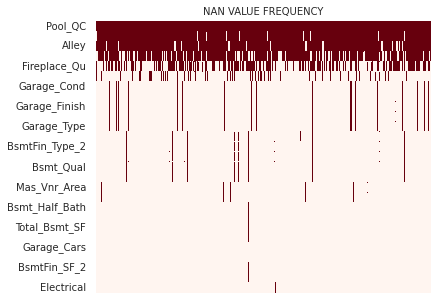

In [ ]:
# Create mask to find variables with null values
null_values = data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)

# Columns with missing values (sorted from highest to lowest)
plt.figure(figsize=(6,5))
ax = sns.heatmap(data.isnull()[null_values.index].transpose(), xticklabels=False, cbar=False, cmap='Reds')
ax = plt.gca()
ax.tick_params(labelsize=10)
plt.title('NAN VALUE FREQUENCY', fontsize=10);

Text(0.5, 1.0, 'ZERO VALUE FREQUNCY')

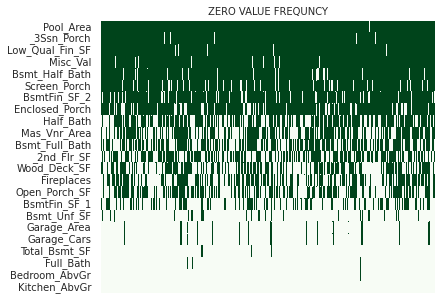

In [ ]:
# Create mask to find all variables with zero values
zero_values = data.isin([0]).sum().sort_values(ascending=False)
zero_values = zero_values[zero_values > 0]

# Columns with zeroes (sorted from highest to lowest)
plt.figure(figsize=(6,5))
sns.heatmap(data.isin([0])[zero_values.index].transpose(), xticklabels=False, cbar=False, cmap='Greens')
ax = plt.gca()
ax.tick_params(labelsize=10)
plt.title('ZERO VALUE FREQUNCY', fontsize=10)

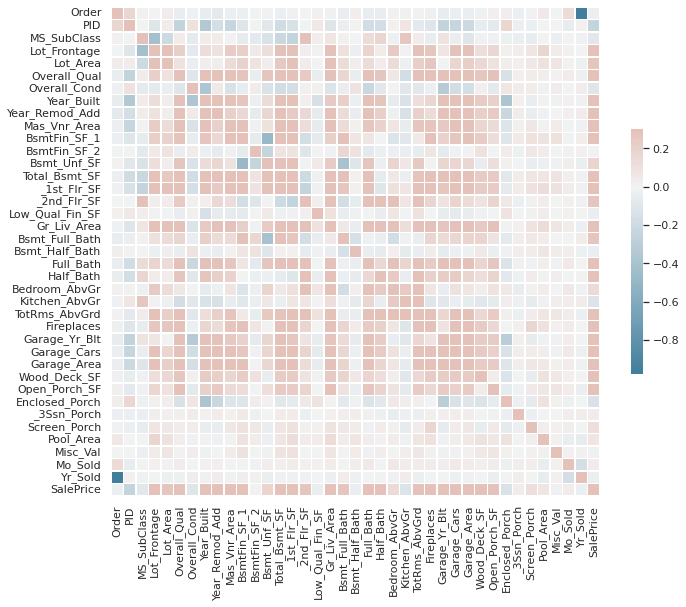

In [ ]:
corr = data.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#HIGH POSITIVE CORRELATION
high_Pcorr = list(corr.SalePrice[(corr.SalePrice > 0.6)].index.values)
high_Pcorr

['Overall_Qual',
 'Total_Bsmt_SF',
 '_1st_Flr_SF',
 'Gr_Liv_Area',
 'Garage_Cars',
 'Garage_Area',
 'SalePrice']

In [ ]:
#HIGH NEGATIVE CORRELATION
high_Ncorr = list(corr.SalePrice[(corr.SalePrice < 0)].index.values)
high_Ncorr

['Order',
 'PID',
 'MS_SubClass',
 'Overall_Cond',
 'Low_Qual_Fin_SF',
 'Bsmt_Half_Bath',
 'Kitchen_AbvGr',
 'Enclosed_Porch',
 'Misc_Val',
 'Yr_Sold']

,Overall_Qual,Total_Bsmt_SF,_1st_Flr_SF,Gr_Liv_Area,Garage_Cars,Garage_Area,SalePrice
Overall_Qual,1.000000,0.547294,0.477837,0.570556,0.599545,0.563503,0.799262
Total_Bsmt_SF,0.547294,1.000000,0.800720,0.444675,0.437608,0.485504,0.632280
_1st_Flr_SF,0.477837,0.800720,1.000000,0.562166,0.439458,0.491223,0.621676
Gr_Liv_Area,0.570556,0.444675,0.562166,1.000000,0.488829,0.484892,0.706780
Garage_Cars,0.599545,0.437608,0.439458,0.488829,1.000000,0.889676,0.647877
Garage_Area,0.563503,0.485504,0.491223,0.484892,0.889676,1.000000,0.640401
SalePrice,0.799262,0.632280,0.621676,0.706780,0.647877,0.640401,1.000000


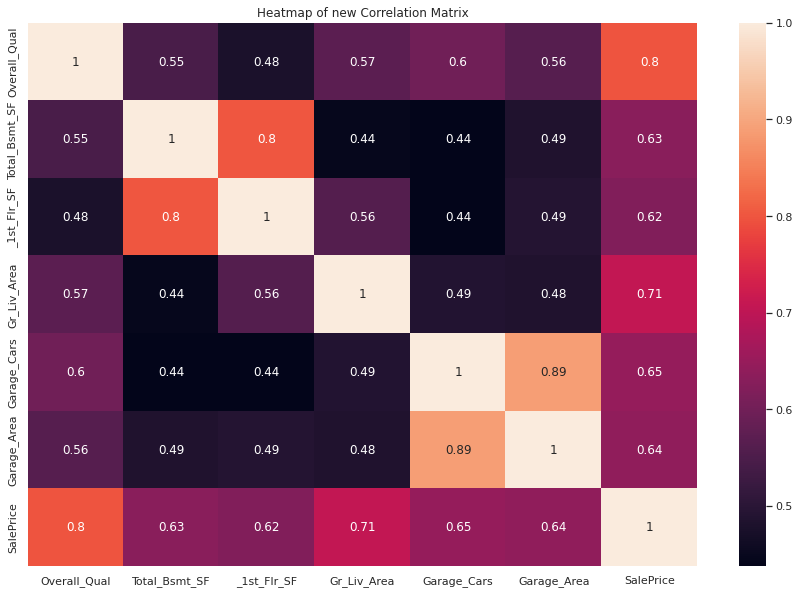

In [ ]:
new_corr = data[high_Pcorr].corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_corr, annot=True,
            xticklabels=new_corr.columns.values,
            yticklabels=new_corr.columns.values)
plt.title('Heatmap of new Correlation Matrix')
new_corr

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


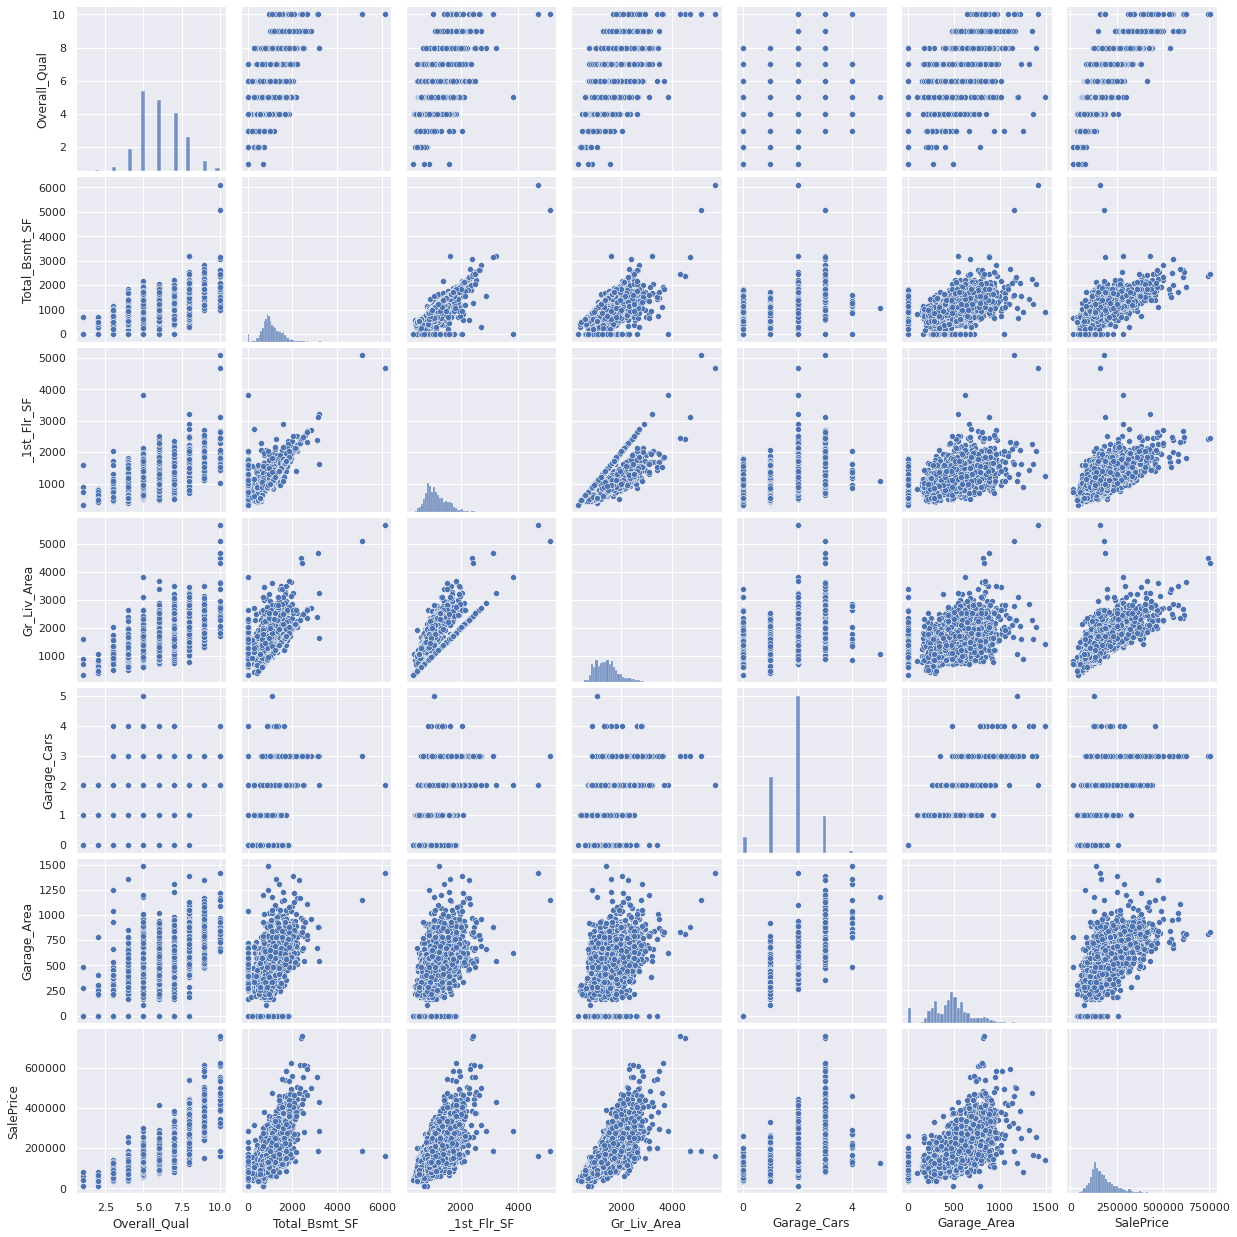

In [ ]:
sns.set()
sns.pairplot(data[high_Pcorr], size=2.5)

### EDA with High Correlation Numeric Variables

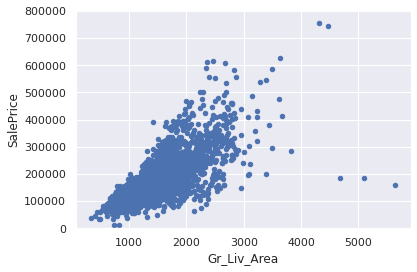

In [ ]:
data_sp_glivarea = pd.concat([data['SalePrice'], data['Gr_Liv_Area']], axis=1)
data_sp_glivarea.plot.scatter(x='Gr_Liv_Area', y='SalePrice', ylim=(0,800000))

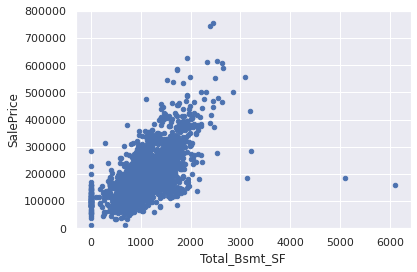

In [ ]:
data_sp_tot = pd.concat([data['SalePrice'], data['Total_Bsmt_SF']], axis=1)
data_sp_tot.plot.scatter(x='Total_Bsmt_SF', y='SalePrice', ylim=(0,800000))

### EDA with High Correlation Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

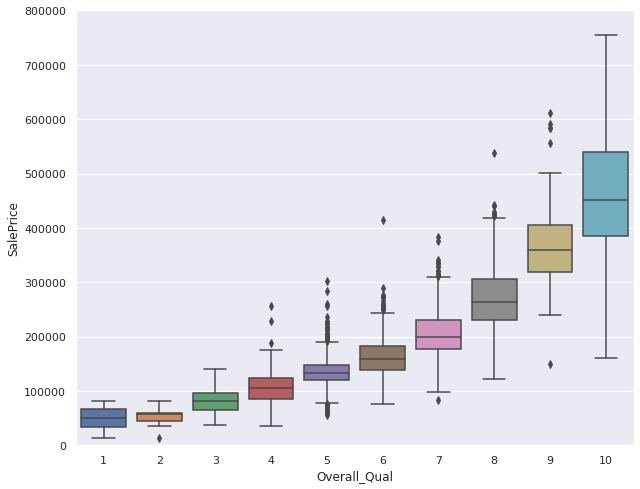

In [ ]:
data1 = pd.concat([data['SalePrice'], data['Overall_Qual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='Overall_Qual', y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000)

##**TARGET VARIABLE : SKEWNESS AND KURTOSIS**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


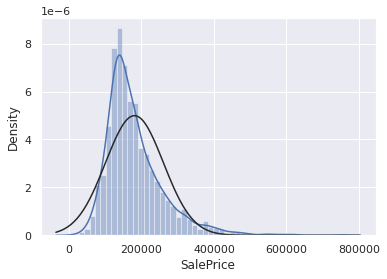

In [ ]:
sns.distplot(data['SalePrice'],fit=norm);

In [ ]:
skew = data['SalePrice'].skew()
kurt = data['SalePrice'].kurt()

print("KURTOSIS : ",kurt)
print("SKEWNESS : ",skew)

KURTOSIS :  5.118899951130896
SKEWNESS :  1.7435000757376466


((array([-3.49555212, -3.25141499, -3.11638513, ...,  3.11638513,
          3.25141499,  3.49555212]),
  array([ 12789,  13100,  34900, ..., 625000, 745000, 755000])),
 (74825.86317555293, 180796.0600682594, 0.935802601104888))

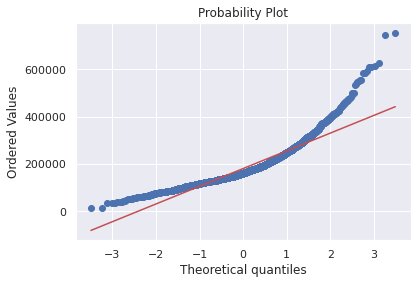

In [ ]:
stats.probplot(data['SalePrice'],plot=plt)

### SALE PRICE VS LOT AREA

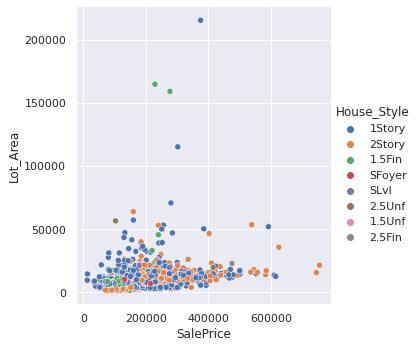

In [ ]:
sns.relplot(x='SalePrice',y='Lot_Area',hue='House_Style',data=data)

###SALE PRICE VS OVERALL QUALITY

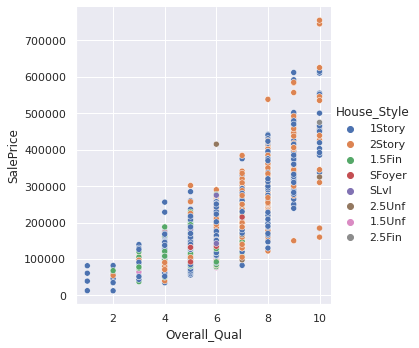

In [ ]:
sns.relplot(x='Overall_Qual',y='SalePrice',hue='House_Style',data=data)

SALEPRICE VS BUILDING TYPE

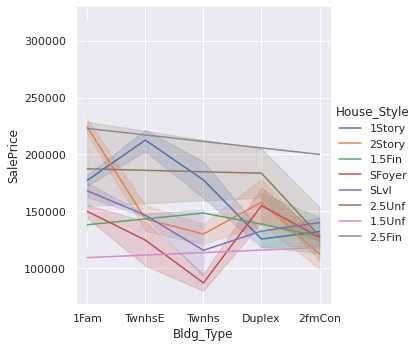

In [ ]:
sns.relplot(data=data, x="Bldg_Type", y="SalePrice",hue='House_Style',kind="line")

###SALES PER MONTH

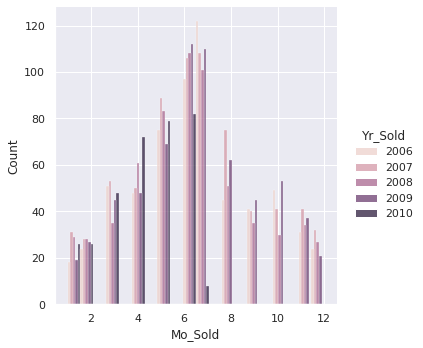

In [ ]:
sns.displot(data, x="Mo_Sold", hue="Yr_Sold",multiple="dodge")

###SALES PER MONTH EACH YEAR FOR 2006-2010

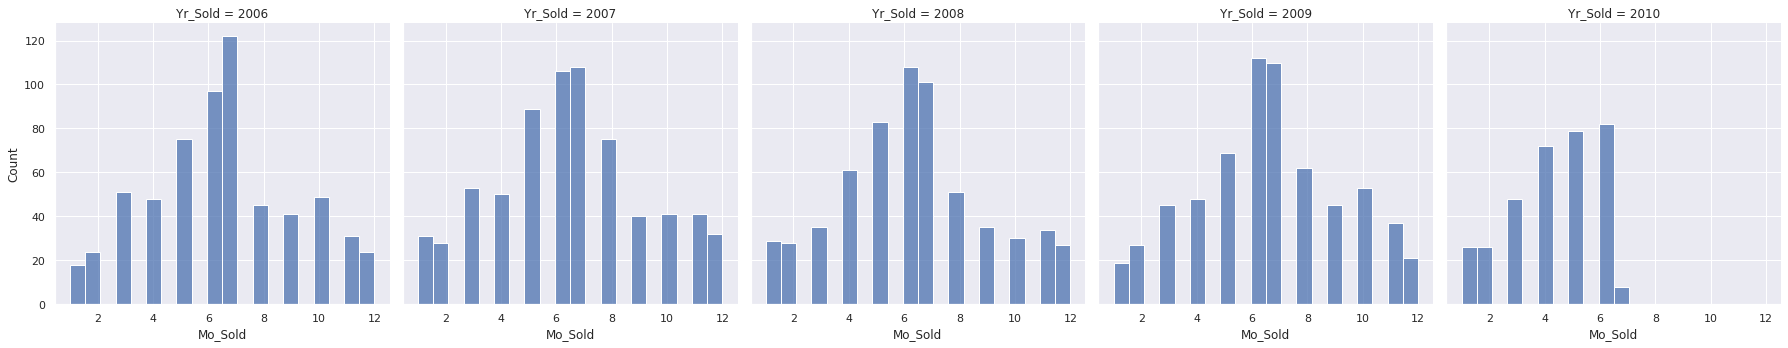

In [ ]:
sns.displot(data, x="Mo_Sold",col="Yr_Sold")

##NEIGHBORHOOD ANALYSIS

In [ ]:
data['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


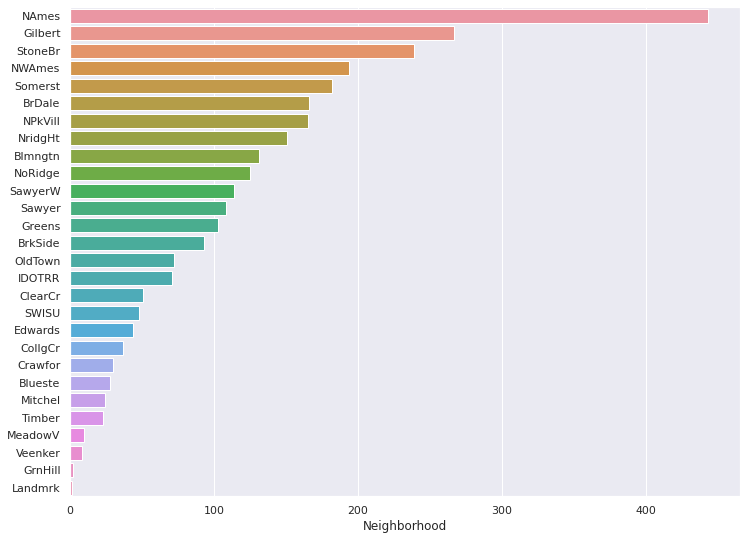

In [ ]:
f, ax = plt.subplots(figsize=(12, 9));
sns.barplot(data['Neighborhood'].value_counts(),data['Neighborhood'].unique(),ax=ax);

In [ ]:
total = data['Neighborhood'].value_counts()
perc = data['Neighborhood'].value_counts()/data['Neighborhood'].count()
price = pd.DataFrame(data.groupby('Neighborhood')["SalePrice"].mean())
neighborhood_distribution = pd.concat([total,perc*100,price],axis=1,keys=['Count','Percentage',"Average"])
neighborhood_distribution

,Count,Percentage,Average
,Neighborhood,Neighborhood,SalePrice
NAmes,443,15.119454,145097.349887
CollgCr,267,9.112628,201803.434457
OldTown,239,8.156997,123991.891213
Edwards,194,6.621160,130843.381443
Somerst,182,6.211604,229707.324176
NridgHt,166,5.665529,322018.265060
Gilbert,165,5.631399,190646.575758
Sawyer,151,5.153584,136751.152318
NWAmes,131,4.470990,188406.908397


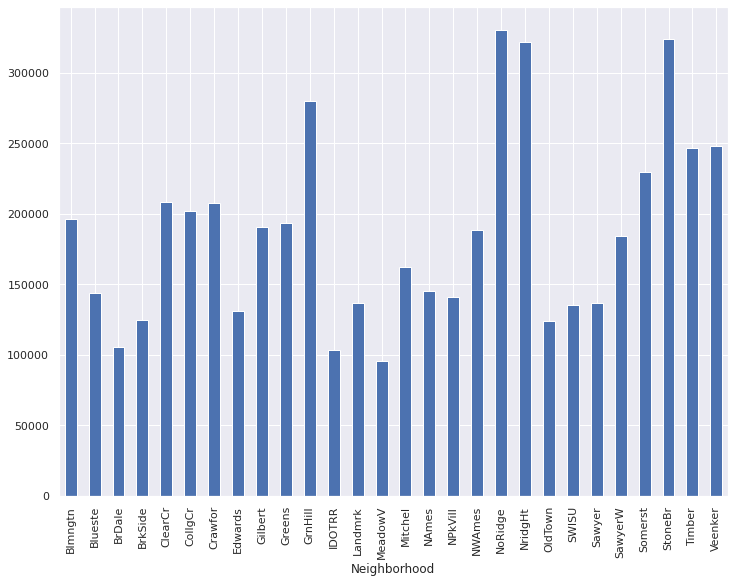

In [ ]:
f, ax = plt.subplots(figsize=(12, 9));
data.groupby('Neighborhood')["SalePrice"].mean().plot.bar()